In [1]:
# Importing the reqired basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()
sns.set()

In [2]:
#importing modules required for preprocessing data
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

# importing models
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

### Loading the new dataset

In [3]:
# importing the file into a dataframe and displaying the rows
vehicledf=pd.read_csv('vehicle.csv')
vehicledf.T

,0,1,2,3,4,5,6,7,8,9,...,836,837,838,839,840,841,842,843,844,845
compactness,95,91,104,93,85,107,97,90,86,93,...,87,94,95,90,93,93,89,106,86,85
circularity,48,41,50,41,44,NaN,43,43,34,44,...,45,46,43,44,34,39,46,54,36,36
distance_circularity,83,84,106,82,70,106,73,66,62,98,...,66,77,76,72,66,87,84,101,78,66
radius_ratio,178,141,209,159,205,172,173,157,140,NaN,...,139,169,142,157,140,183,163,222,146,123
pr.axis_aspect_ratio,72,57,66,63,103,50,65,65,61,62,...,58,60,57,64,56,64,66,67,58,55
max.length_aspect_ratio,10,9,10,9,52,6,6,9,7,11,...,8,8,10,8,7,8,11,12,7,5
scatter_ratio,162,149,207,144,149,255,153,137,122,183,...,140,158,151,137,130,169,159,222,135,120
elongatedness,42,45,32,46,45,26,42,48,54,36,...,47,42,44,48,51,40,43,30,50,56
pr.axis_rectangularity,20,19,23,19,19,28,19,18,17,22,...,18,20,19,18,18,20,20,25,18,17
max.length_rectangularity,159,143,158,143,144,169,143,146,127,146,...,148,148,149,144,120,134,159,173,124,128


### Data preprocessing

In [4]:
#checking for null/NA values
print(vehicledf.isna().sum())
print(vehicledf.isna().sum().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64
41


###### Since there are only a few null values in the data, we can replace them with the median values for all the columns except class

In [5]:
# Replacing NaN values with column medians
for j in vehicledf.columns[:-1]:
    vehicledf[j]=vehicledf[j].fillna(vehicledf[j].median())

In [6]:
# Checking the number of unique values for each attribute
print("number of unique values:")
for i in vehicledf.columns:
    print(i,"- ",vehicledf[i].nunique())

number of unique values:
compactness -  44
circularity -  27
distance_circularity -  63
radius_ratio -  134
pr.axis_aspect_ratio -  37
max.length_aspect_ratio -  21
scatter_ratio -  131
elongatedness -  35
pr.axis_rectangularity -  13
max.length_rectangularity -  66
scaled_variance -  128
scaled_variance.1 -  423
scaled_radius_of_gyration -  144
scaled_radius_of_gyration.1 -  40
skewness_about -  23
skewness_about.1 -  41
skewness_about.2 -  30
hollows_ratio -  31
class -  3


In [7]:
# Checking the values in target variable
vehicledf['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [8]:
# Changing the object values to categorical values for target variable.
vehicledf['class']= pd.Categorical(vehicledf['class'])
print(vehicledf['class'].unique())
vehicledf.info()

[van, car, bus]
Categories (3, object): [van, car, bus]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_r

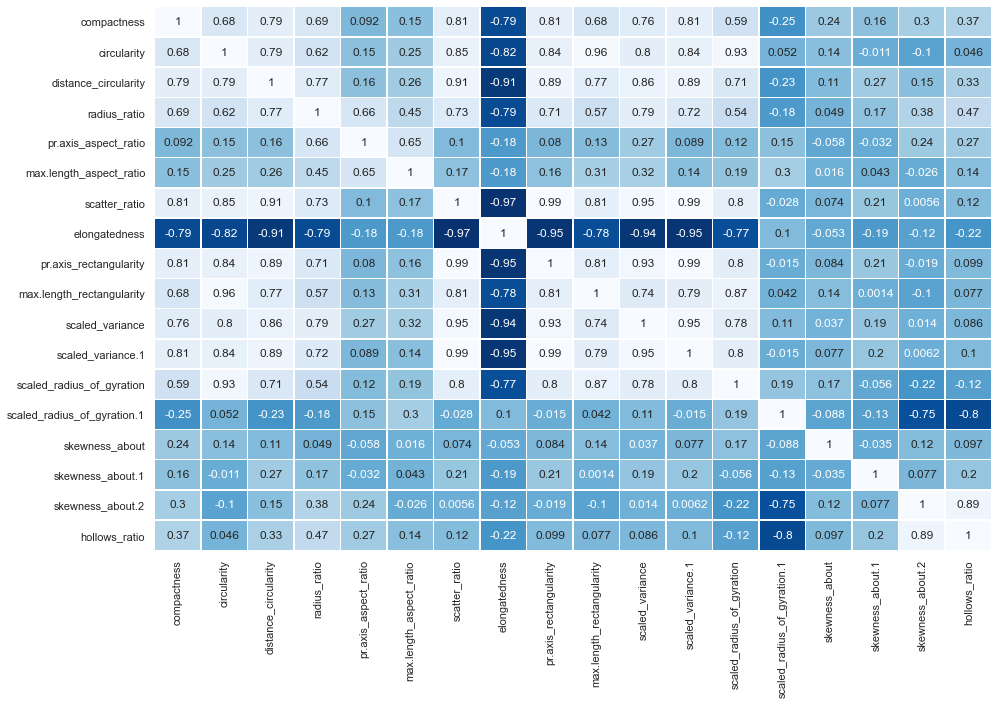

In [9]:
## Plotting the correlation matrix on a heatmap
plt.figure(figsize=[15,10])
sns.heatmap(vehicledf.corr(), 
            cmap='Blues_r',
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False
           )
plt.show();

### Considering the correlation metrix above, the following attributes show high correlation:
#### High positive coreelation-
1. scatter_ratio and pr.axis_rectangularity -- 99%
2. scatter_ratio and scaled_variance.1 -- 99%
3. scatter_ratio and scaled_variance -- 95%
4. circularity and max.length_rectangularity -- 96%

#### High negative correlation-
1. scatter_ratio and elongatedness -- 97%

###### Since these attributes are highly dependent, these can be dropped for the analysis.
###### The following attributes will be dropped -
1. pr.axis_rectangularity,scaled_variance.1,scaled_variance and elongatedness would be dropped keeping scatter_ratio
2. max.length_rectangularity would be dropped keeping circularity

In [10]:
# Dropping the highly correlated attributes
vehicledf.drop(columns=['pr.axis_rectangularity','scaled_variance.1',
                        'elongatedness','scaled_variance','max.length_rectangularity'],inplace=True)

In [11]:
#checking the description for percentiless and outlier values.
vehicledf.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.0,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.0,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.0,265.0
scaled_radius_of_gyration,846.0,174.706856,32.546277,109.0,149.00,173.5,198.0,268.0
scaled_radius_of_gyration.1,846.0,72.443262,7.468734,59.0,67.00,71.5,75.0,135.0
skewness_about,846.0,6.361702,4.903244,0.0,2.00,6.0,9.0,22.0


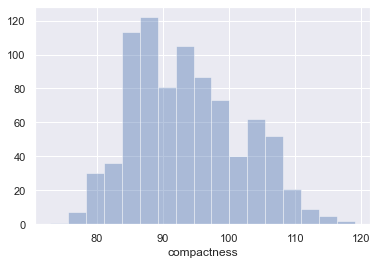

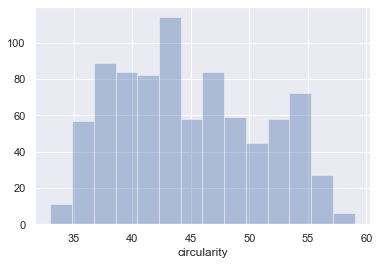

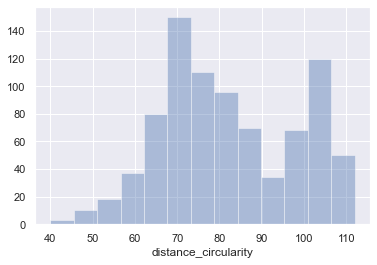

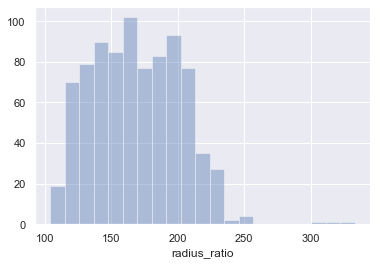

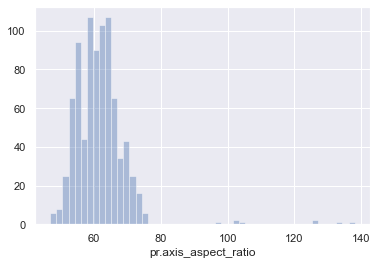

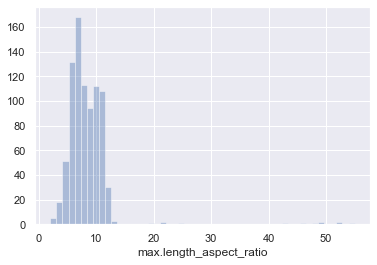

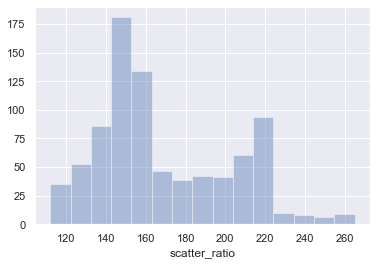

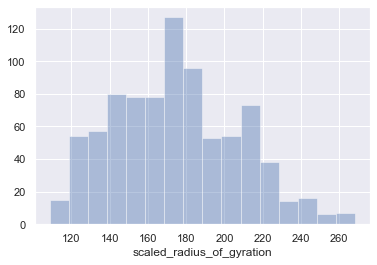

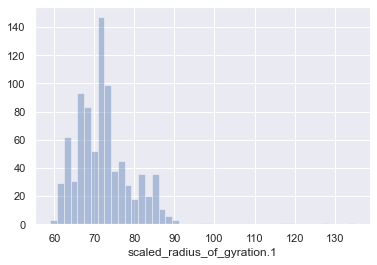

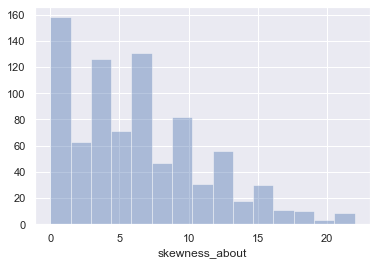

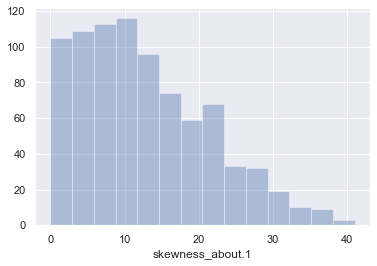

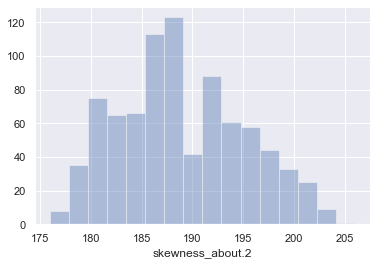

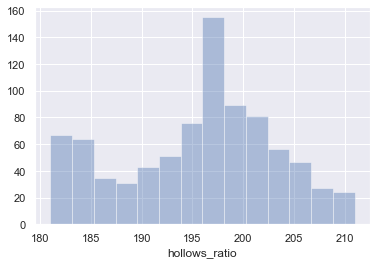

In [12]:
## Univariate plots for each attribute to visualise the data shape, outliers and spread
for j in vehicledf.columns[:-1]:
    sns.distplot(vehicledf[j], kde=False)
    plt.show();

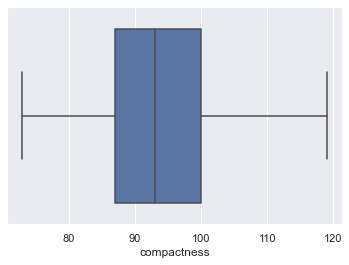

For  compactness - Mean = 93.678, Median = 93.000 and Skewness = 0.381


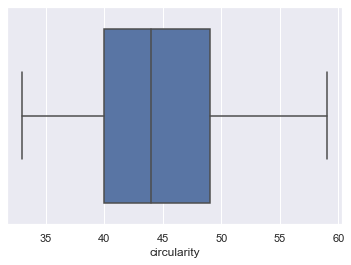

For  circularity - Mean = 44.824, Median = 44.000 and Skewness = 0.265


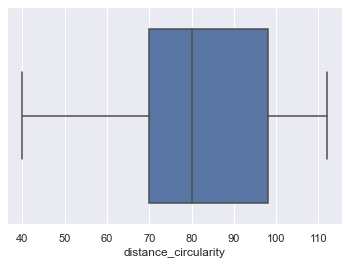

For  distance_circularity - Mean = 82.100, Median = 80.000 and Skewness = 0.109


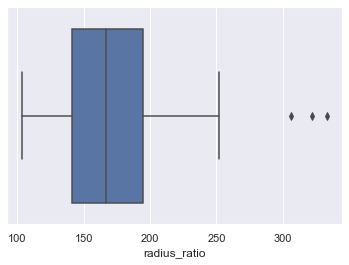

For  radius_ratio - Mean = 168.875, Median = 167.000 and Skewness = 0.398


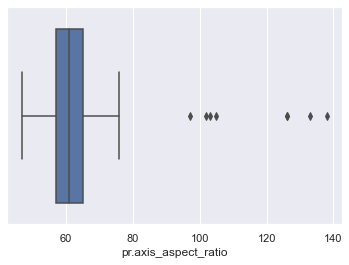

For  pr.axis_aspect_ratio - Mean = 61.677, Median = 61.000 and Skewness = 3.835


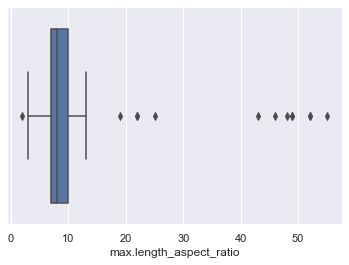

For  max.length_aspect_ratio - Mean = 8.567, Median = 8.000 and Skewness = 6.778


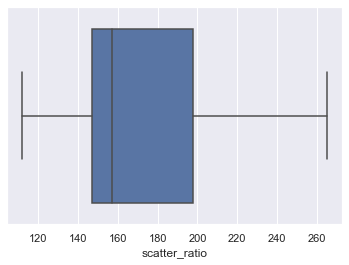

For  scatter_ratio - Mean = 168.888, Median = 157.000 and Skewness = 0.609


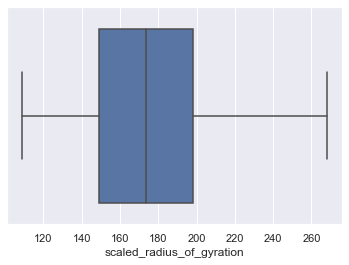

For  scaled_radius_of_gyration - Mean = 174.707, Median = 173.500 and Skewness = 0.280


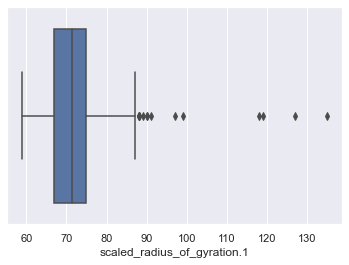

For  scaled_radius_of_gyration.1 - Mean = 72.443, Median = 71.500 and Skewness = 2.090


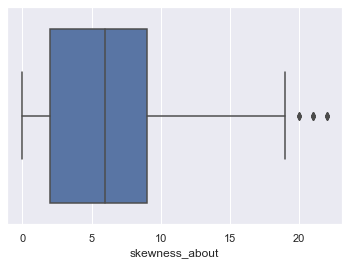

For  skewness_about - Mean = 6.362, Median = 6.000 and Skewness = 0.781


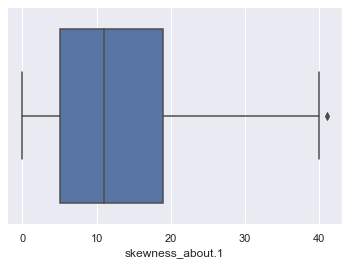

For  skewness_about.1 - Mean = 12.600, Median = 11.000 and Skewness = 0.689


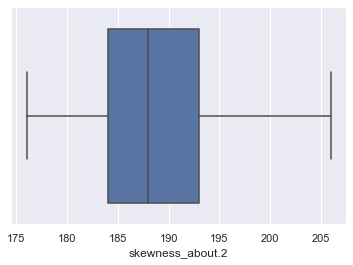

For  skewness_about.2 - Mean = 188.918, Median = 188.000 and Skewness = 0.250


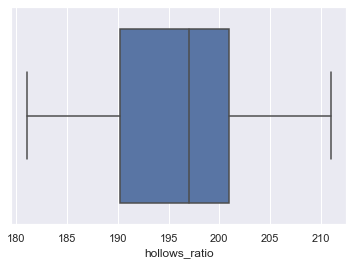

For  hollows_ratio - Mean = 195.632, Median = 197.000 and Skewness = -0.226


In [13]:
## plotting boxplots for tails and outliers and displaying mean, median and skewness of attributes
for cols in vehicledf.drop(columns='class').columns:
    sns.boxplot(vehicledf[cols])
    plt.show();
    print("For ",cols,"- Mean = %.3f, Median = %.3f and Skewness = %.3f" 
          %(vehicledf[cols].mean(),vehicledf[cols].median(),vehicledf[cols].skew()))

### The above graphs and description table shows how the data is spread for each attribute with its mean, median and skewness mentioned.
1. The attributes pr.axis_aspect_ratio,max.length_aspect_ratio and scaled_radius_of_gyration.1 are highly skewed to the right with a few outliers
2. The attributes skewness_about.1,skewness_about and radius_ratio show a few outliers.
3. The attribute hollows_ratio shows slight negative skewness

#### Creating a pairplot of the attributes distincted with target variable for visual data representation across different classes.

<Figure size 2160x1440 with 0 Axes>

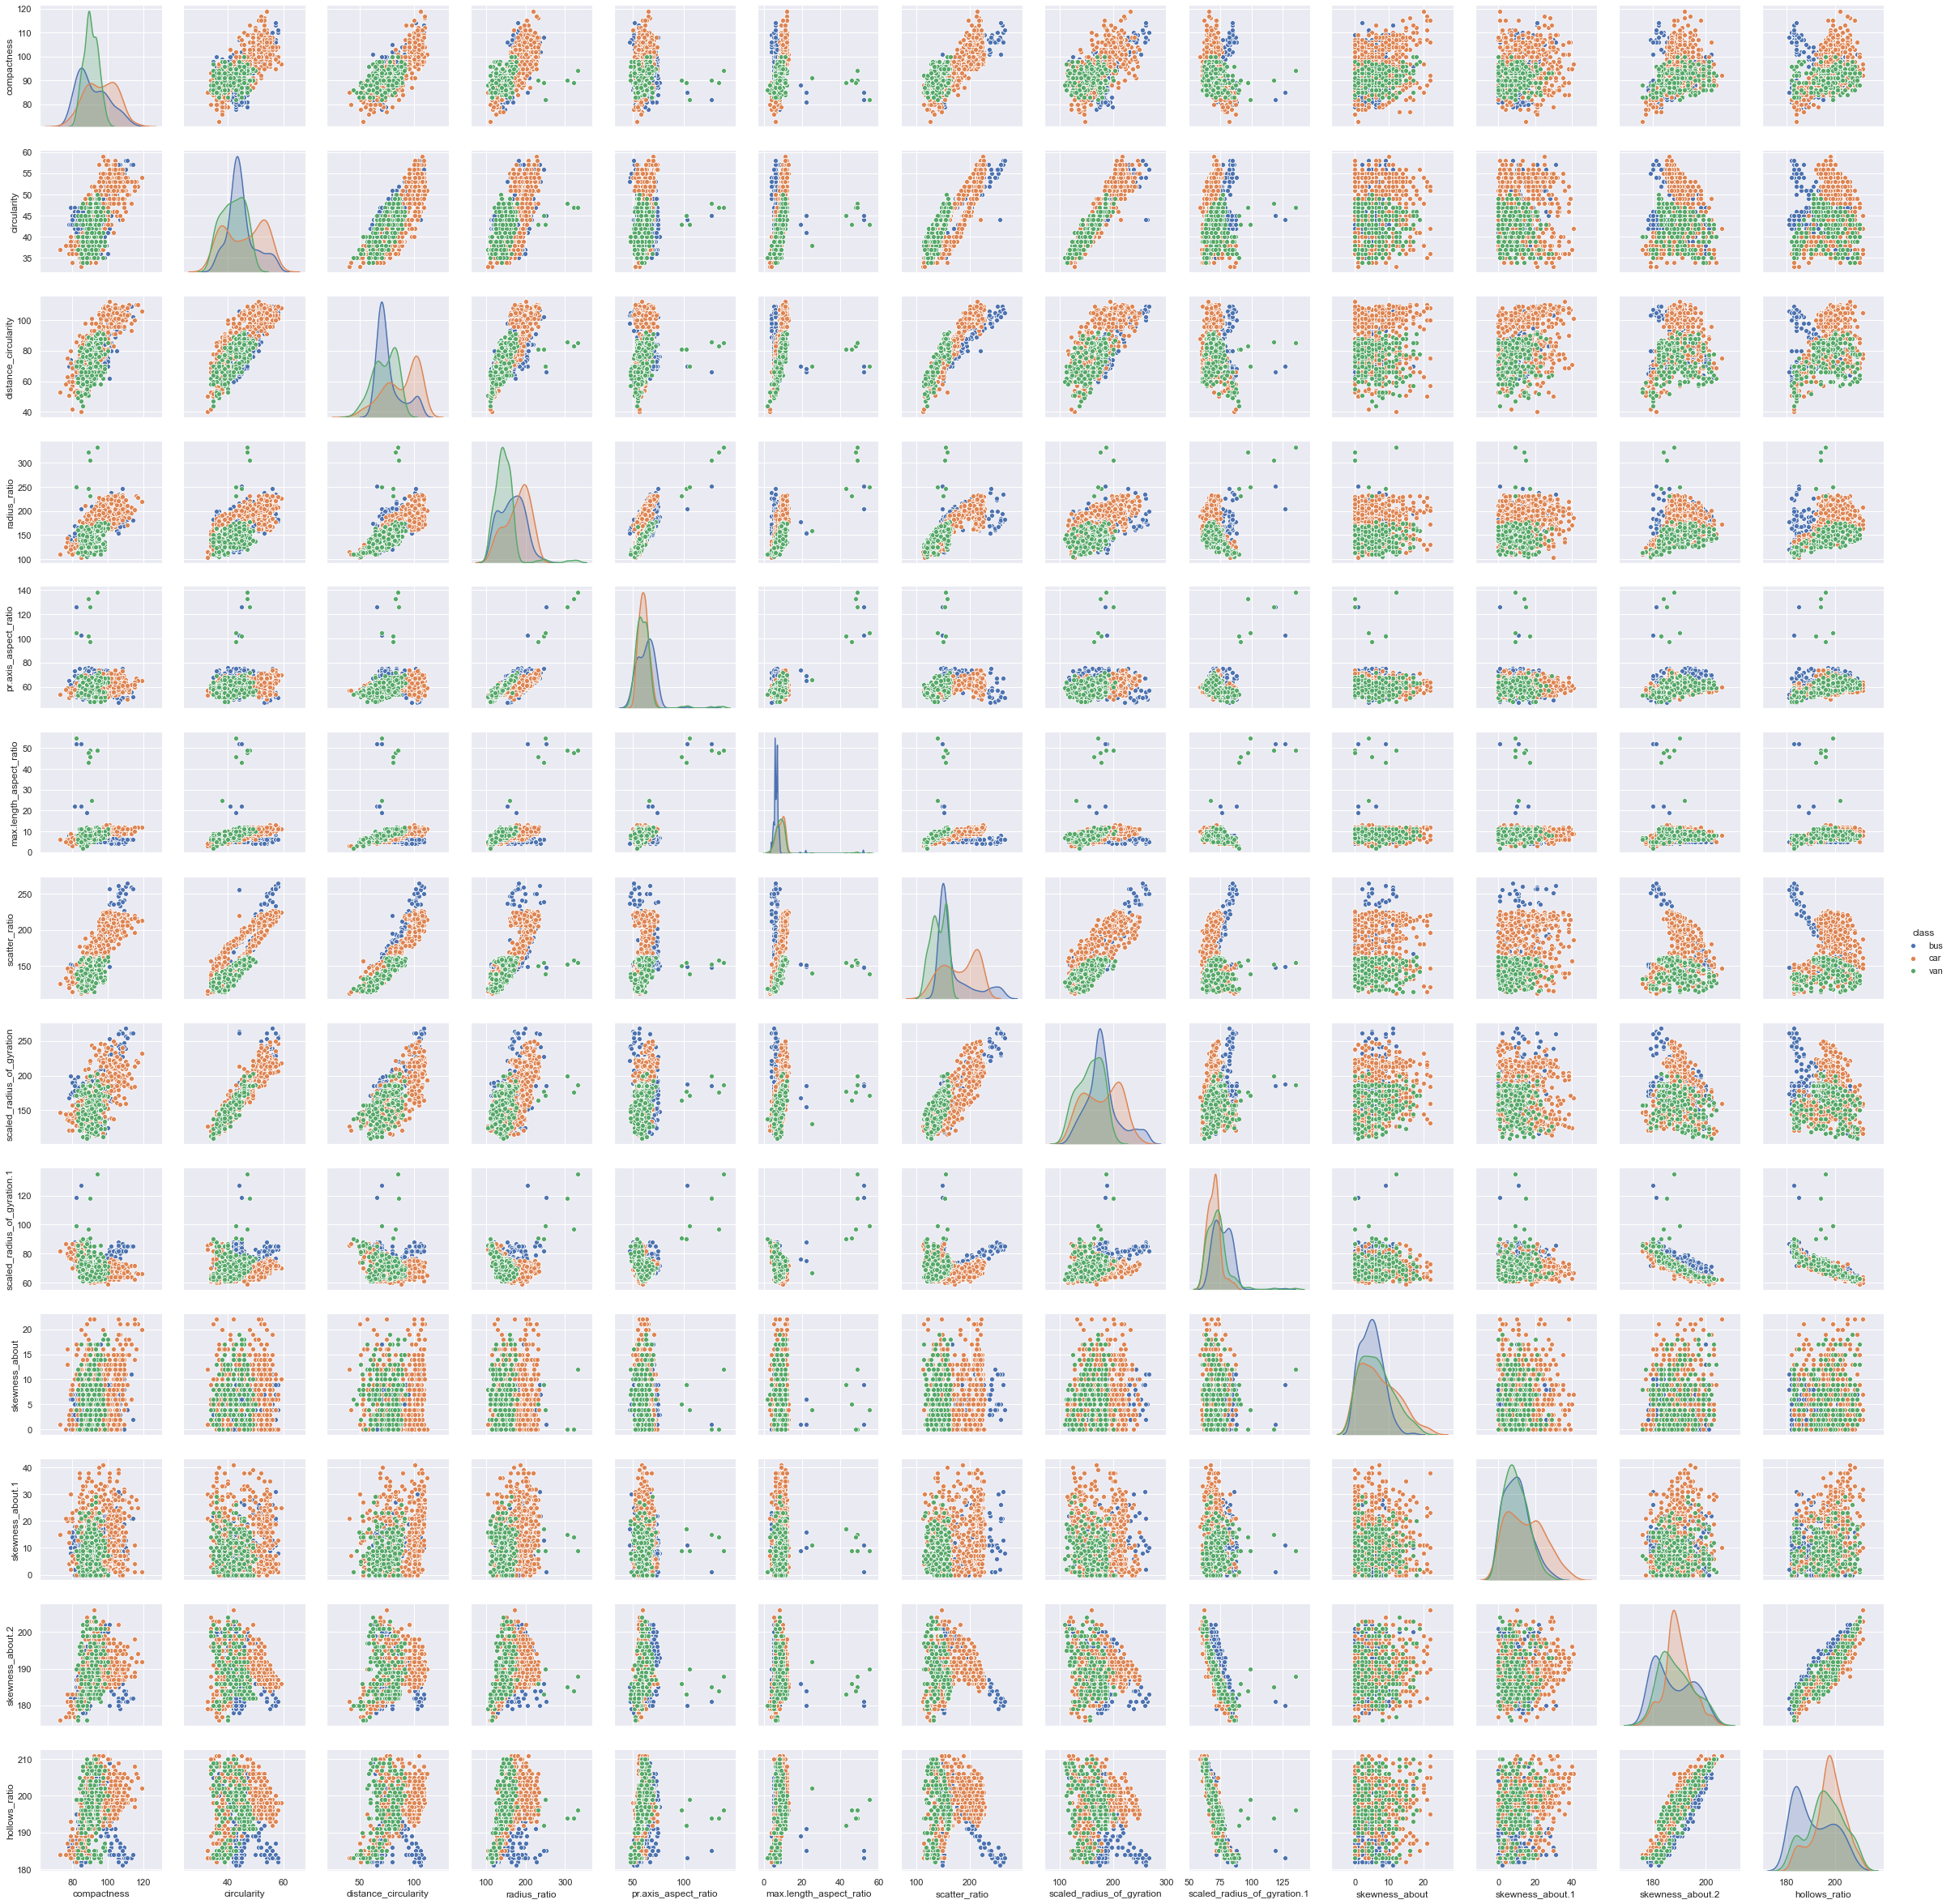

In [14]:
## Visualising relationships using pariplot, with class distincted for each attribute
plt.figure(figsize=(30,20))
sns.pairplot(vehicledf, diag_kind='kde',hue='class')
plt.show();

##### It can be clearly seen that even though the classes overlap for data points in different attributes, they can be visualised distinctly for their distribution.
Also the dependency and correlation can be clearly visualised for the remaining attributes.

## Data split and model fitting

In [15]:
## Splitting the dataset into input variables and target variable 
## Taking class as target variable
X_val=vehicledf.drop(columns='class')
Y_val=vehicledf['class']

# Applying Zscore on input variables to balance the scale.
XScaled=X_val.apply(zscore)

In [16]:
# Splitting data into train and test in ratio 7:3 
# class as target variable
# Using train_test_split from sklearn.model_selection
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y_val, test_size=0.3, random_state=10)
x_train.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
285,-0.568495,0.518073,0.184305,0.602886,0.294851,-0.123383,0.003385,0.470167,-1.131150,-0.073812,-0.851529,0.989095,0.721997
379,1.375705,1.822993,1.010632,1.202018,0.294851,0.529004,1.450123,1.269502,-0.059384,-0.890081,0.716979,-0.149374,0.452977
816,-0.446982,0.518073,0.184305,-0.355726,0.294851,0.529004,-0.237738,0.347193,0.208557,-0.686013,0.380870,-0.637289,-0.085062
33,0.889655,0.518073,1.582705,1.591454,0.802624,0.311542,1.178859,0.900578,-0.327326,-0.277879,2.845668,0.175903,0.856507
126,-0.568495,-0.460617,-0.769150,-0.625335,0.040964,-0.340845,-0.659704,-0.667348,0.476499,-0.890081,-0.739492,-0.474650,-0.892121


In [17]:
## defining function to fit the model, print the train and test accuracies.
def fit_model(model, X_train, X_test, Y_train, Y_test):  # take the model, train data and test data as input
    
    model.fit(X_train, Y_train)   # fit the model using the train data
    print("Train Accuracy= %.3f " %(model.score(X_train,Y_train)*100))
    
    pred = model.predict(X_test)     # model predictions on the test data
    
    print("Test Accuracy= %.3f" %(model.score(X_test, Y_test)*100))

In [18]:
# Calling the fit model funcion to fit SVC on train data and print the accuracies
fit_model(SVC(),x_train,x_test,y_train,y_test)

Train Accuracy= 96.453 
Test Accuracy= 95.669


### The model created on the original data shows 96.5% train accuracy and 95.7% test accuracy. It can be safely assumed that the model doesn't overfit.

In [19]:
### Performing cross fold validation on the original data
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = SVC()
results = cross_val_score(model, XScaled, Y_val, cv=kfold)
print(num_folds,"fold cross validation Accuracy = %.3f" %(results.mean()*100))

10 fold cross validation Accuracy = 95.511


#### The k-fold cross validation with k=10 gives the accuracy of 95.6% for the model

## Using PCA for Principal components

In [20]:
# using PCA from sklearn.decomposition to analyse the principal components
pca=PCA()
pca.fit(XScaled)
pca_ratios=pca.explained_variance_ratio_

## Displaying variance ratios
print(pca_ratios)

[0.39459285 0.21982583 0.13955655 0.08487751 0.06941294 0.03107084
 0.02470299 0.01448968 0.00854347 0.00427212 0.00408646 0.00301828
 0.00155048]


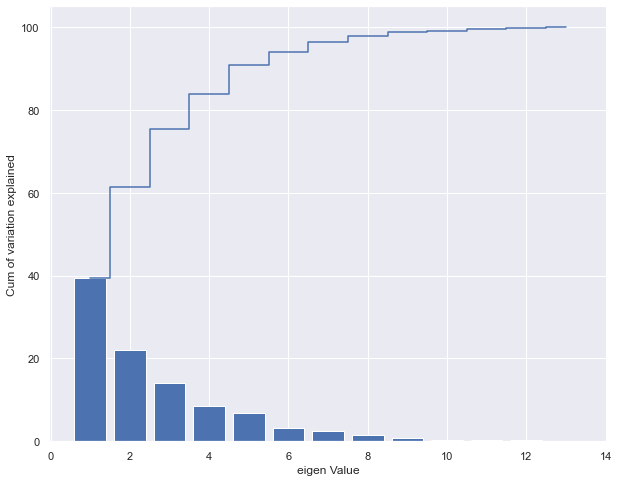

In [21]:
## Plotting the variance ratios with eigen values for component level impact
plt.figure(figsize=[10,8])
plt.bar(list(range(1,len(XScaled.columns)+1)),pca_ratios * 100)
plt.step(list(range(1,len(XScaled.columns)+1)),np.cumsum(pca_ratios * 100), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show();

The above plot shows how the first principal component contributes to around 40% of the variance in data, the first two around 60% and top 5 components contribute to around 90% of variance

In [22]:
## calculating the number of components required for capturing 95% of the variance of data
var=0
count=0
for i in pca_ratios:
    var=var+i
    count=count+1
    if var>0.95:
        break
print(count)
print(var)

7
0.9640395201753893


For more than 95% of the variance to be captured, we need 7 principal components, which contribute to around 96.4% of the data variance.

#####  Using n_components=7 for creating a new dataset with only top 7 principal components used.

In [23]:
### Analysisng principal components for number of components capturing more than 95% of variance.
pca_n = PCA(n_components=count)
pca_n.fit(XScaled)
pca_n_ratios=pca_n.explained_variance_ratio_
print(pca_n_ratios)
XScaled_pca= pca_n.transform(XScaled)

[0.39459285 0.21982583 0.13955655 0.08487751 0.06941294 0.03107084
 0.02470299]


#### Training the model on the new dataset with only principal components

In [24]:
### Splitting the new dataset with only principal components into train and test in ratio 7:3 
### using the same random state as used for original split.
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(XScaled_pca, Y_val, test_size=0.3, random_state=10)

# Fitting the svc model on principal component data and printing the accuracy.
fit_model(SVC(),x_train_p,x_test_p,y_train_p,y_test_p)

Train Accuracy= 91.385 
Test Accuracy= 91.339


The model gives a train accuracy of 91.4% and test accuracy of 91.3%

#### Performing the k-fold cross validation with k=10 and same random state as for original data

In [25]:
### Performing cross fold validation on the principal component data using the same random_state
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = SVC()
results = cross_val_score(model, XScaled_pca, Y_val, cv=kfold)
print(results.mean()*100.0)

89.59663865546217


The k-fold cross validation with k=10 gives the accuracy of 89.6% for the model built over principal component data.

In [26]:
## Checking the percentage drop in the accuracy
print((95.669-91.339)*100/95.669)
print(95.669-91.339)
print(95.6-89.6)
## checking the percentage drop in principal components
print((len(XScaled.columns)-count)/len(XScaled.columns))

4.526022013400368
4.329999999999998
6.0
0.46153846153846156


#### The accuracy score and the cross validation score of original data were 95.7% and 95.6% respectively for 13 components
#### The accuracy score and the cross validation score of data using principal components were 91.3% and 89.6% for 7 components

This shows that a 46% drop in components (from 13 to 8) incurs an average loss of around 5.2%( 4.3% in accuracy scores and 6% in k fold accuracy) in the overall accuracy of the model.
It can also be viewed as just a 4.5% drop in accuracy caused by 46% drop in components. 

Thus it can be concluded that using PCA we can decrease the dimensions and consequently, the computing power required as well as the processing time whilst increasing the efficieny without suffering from major drop in accuracy.
So, if the business can sustain a slight drop in accuracy, it can be traded for less complex and more efficient model using Principal Component Analysis.